In [1]:
#import pandas as pd
#import json
import networkx as nx

In [2]:
import sys
sys.path.append("../pysad")
#import pysad
#import pysad.utils
import pysad.exploration
import pysad.synthesis
import pysad.graph
from pysad.NodeInfo import SynthNodeInfo

In [3]:
import test_module

# Creating the graph

In [4]:
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)
importlib.reload(test_module)

<module 'test_module' from '/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py'>

In [5]:
data_path = '../synthesis/'


In [7]:
sys.path.append("../littleballoffur")

In [8]:
from littleballoffur.dataset import GraphReader

In [22]:
graph_type = 'real'
if graph_type == 'BA':
    graphname = 'Barabasi-Albert graph'
    nodes = 50000
    edges_per_node = 5
    G = nx.barabasi_albert_graph(nodes, edges_per_node)
elif graph_type == 'ER':
    graphname = 'Erdos-Renyi graph'
    nb_nodes = 50000
    nb_edges = 500000
    G = nx.gnm_random_graph(nb_nodes, nb_edges)
elif graph_type == 'real':
    graphname = 'real network (Facebook)'
    reader = GraphReader("facebook")
    G = reader.get_graph()
else:
    raise ValueError('Unknow graph type.')
graph_handle = pysad.synthesis.SyntheticNetwork(G)
G.graph['name'] = graphname
if not nx.is_connected(G):
    print('Warning, the graph is not connected.')

In [23]:
print('Graph info')
print('----------')
print('graph type:',G.graph['name'])
print('nb of nodes:',G.number_of_nodes(),', nb of edges:',G.number_of_edges())
# print('Diameter:', nx.diameter(G))

Graph info
----------
graph type: real network (Facebook)
nb of nodes: 22470 , nb of edges: 171002


## Statistics of propagation

In [102]:
import numpy as np
import importlib
importlib.reload(pysad.exploration)
importlib.reload(pysad.synthesis)
importlib.reload(test_module)

<module 'test_module' from '/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py'>

In [26]:
number_of_nodes = int(0.2*G.number_of_nodes())
print('Number of nodes chosen for the subgraph:', number_of_nodes)

Number of nodes chosen for the subgraph: 4494


In [71]:
graph_handle.rules['min_degree'] = 1
def spread(degree,balltype='spikyball2'):
    params = {'nb_iter' : 1, 'exploration_depth' : 15,
            'initial_node' : 420, 'random_subset_size' : 0.1, 'balltype' : balltype,
         'number_of_nodes' : number_of_nodes, 'degree' : degree}
    node_spiky2, graph_spiky2 = test_module.ball_test(graph_handle,params)
    # dictionary with each node as key and its degree as value
    degree_spiky2 = dict(G.degree(node_spiky2.keys()))
    #print('subgraph: nb of nodes:',len(degree_fire))
    print('subgraph: nb of nodes:',graph_spiky2.number_of_nodes(),', edges:',graph_spiky2.number_of_edges())
    dlist_spiky2 = test_module.expand_degrees(node_spiky2, degree_spiky2)
    return dlist_spiky2

## Degree distribution

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.5)

Degree: -2
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 13 subset: 10 in_edges: 2
new edges: 138 subset: 14 in_edges: 54
new edges: 86 subset: 9 in_edges: 38
new edges: 234 subset: 23 in_edges: 17


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


new edges: 1190 subset: 119 in_edges: 49
new edges: 3656 subset: 366 in_edges: 439
new edges: 8064 subset: 806 in_edges: 1809
new edges: 15176 subset: 1518 in_edges: 5080
new edges: 18555 subset: 1856 in_edges: 10058
new edges: 16127 subset: 1613 in_edges: 11979
-- max nb of nodes reached in iteration 11 --
new edges: 4644 subset: 464 in_edges: 3575
subgraph: nb of nodes: 4494 , edges: 27390
Degree: -1
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 16 subset: 2 in_edges: 4


/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:66: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:68: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])


new edges: 28 subset: 3 in_edges: 7
new edges: 17 subset: 2 in_edges: 10
new edges: 111 subset: 11 in_edges: 3
new edges: 186 subset: 19 in_edges: 25
new edges: 773 subset: 77 in_edges: 51
new edges: 3565 subset: 356 in_edges: 233
new edges: 13117 subset: 1312 in_edges: 2478
new edges: 27922 subset: 2792 in_edges: 16430
new edges: 28353 subset: 2835 in_edges: 35964
-- max nb of nodes reached in iteration 11 --
new edges: 10071 subset: 1007 in_edges: 13131
subgraph: nb of nodes: 4494 , edges: 52796
Degree: 0
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 10 subset: 10 in_edges: 2
new edges: 56 subset: 6 in_edges: 27
new edges: 52 subset: 5 in_edges: 23
new edges: 36 subset: 4 in_edges: 5
new edges: 144 subset: 14 in_edges: 8
new edges: 458 subset: 46 in_edges: 54
new edges: 1530 subset: 153 in_edges: 721
new edges: 3066 subset: 307 in_edges: 1830
new edges: 7220 subset: 722 in_edges: 4647
new edges: 19230 subset: 1923 in_edges: 9578
new edges: 24963 s

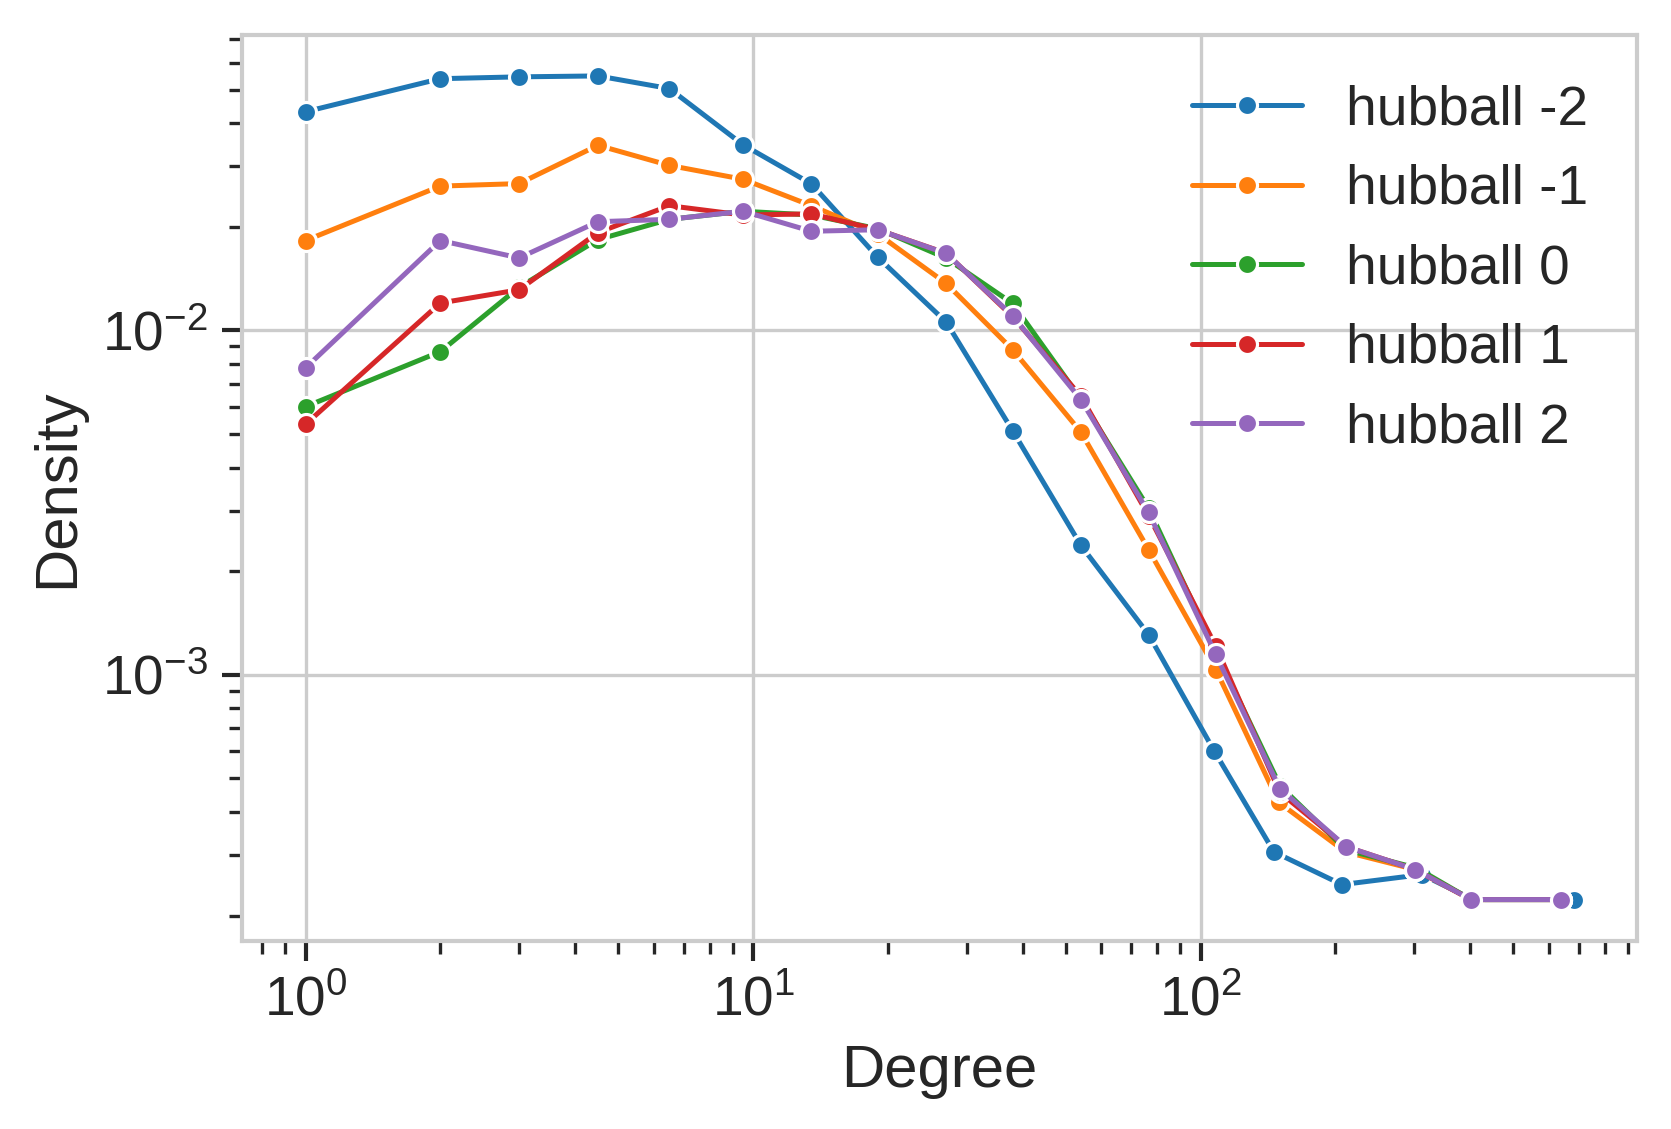

In [112]:

density=True
balltype = 'hubball'
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=300)
plt.xscale('log')
plt.yscale('log')

degrees = [-2,-1,0,1,2]
for d in degrees:
    print('Degree:', d)
    dlist = spread(d,balltype=balltype)
    log_x,log_y = test_module.degree_distribution(dlist, mode='log',density=density)
    sns.lineplot(log_x,log_y,marker='o',label= balltype+ ' ' +str(d))


plt.xlabel('Degree')
plt.ylabel('Density')
#plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + 'degree_distribOrigin_degree_'+ balltype + '_' + graph_type +'.png')

Coefficient: -2
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 15 subset: 2 in_edges: 4
new edges: 39 subset: 4 in_edges: 3
new edges: 162 subset: 16 in_edges: 4


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


new edges: 219 subset: 22 in_edges: 18
new edges: 1005 subset: 100 in_edges: 39
new edges: 5443 subset: 544 in_edges: 337
new edges: 15641 subset: 1564 in_edges: 2738
new edges: 24935 subset: 2494 in_edges: 7105
-- max nb of nodes reached in iteration 9 --
new edges: 25547 subset: 2555 in_edges: 10043
subgraph: nb of nodes: 4494 , edges: 15176
Coefficient: -1
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 22 subset: 2 in_edges: 4
new edges: 27 subset: 3 in_edges: 3
new edges: 39 subset: 4 in_edges: 5


/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:66: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:68: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])


new edges: 70 subset: 7 in_edges: 7
new edges: 218 subset: 22 in_edges: 12
new edges: 548 subset: 55 in_edges: 38
new edges: 1648 subset: 165 in_edges: 152
new edges: 5772 subset: 577 in_edges: 633
new edges: 18757 subset: 1876 in_edges: 3723
new edges: 37324 subset: 3732 in_edges: 19033
-- max nb of nodes reached in iteration 11 --
new edges: 25142 subset: 2514 in_edges: 17802
subgraph: nb of nodes: 4494 , edges: 31162
Coefficient: 0
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 22 subset: 2 in_edges: 4
new edges: 19 subset: 2 in_edges: 4
new edges: 7 subset: 7 in_edges: 4
new edges: 121 subset: 12 in_edges: 33
new edges: 260 subset: 26 in_edges: 38
new edges: 531 subset: 53 in_edges: 66
new edges: 2281 subset: 228 in_edges: 182
new edges: 6842 subset: 684 in_edges: 1663
new edges: 20066 subset: 2007 in_edges: 8782
new edges: 30515 subset: 3052 in_edges: 36643
new edges: 22252 subset: 2225 in_edges: 40849
-- max nb of nodes reached in iteration 12 

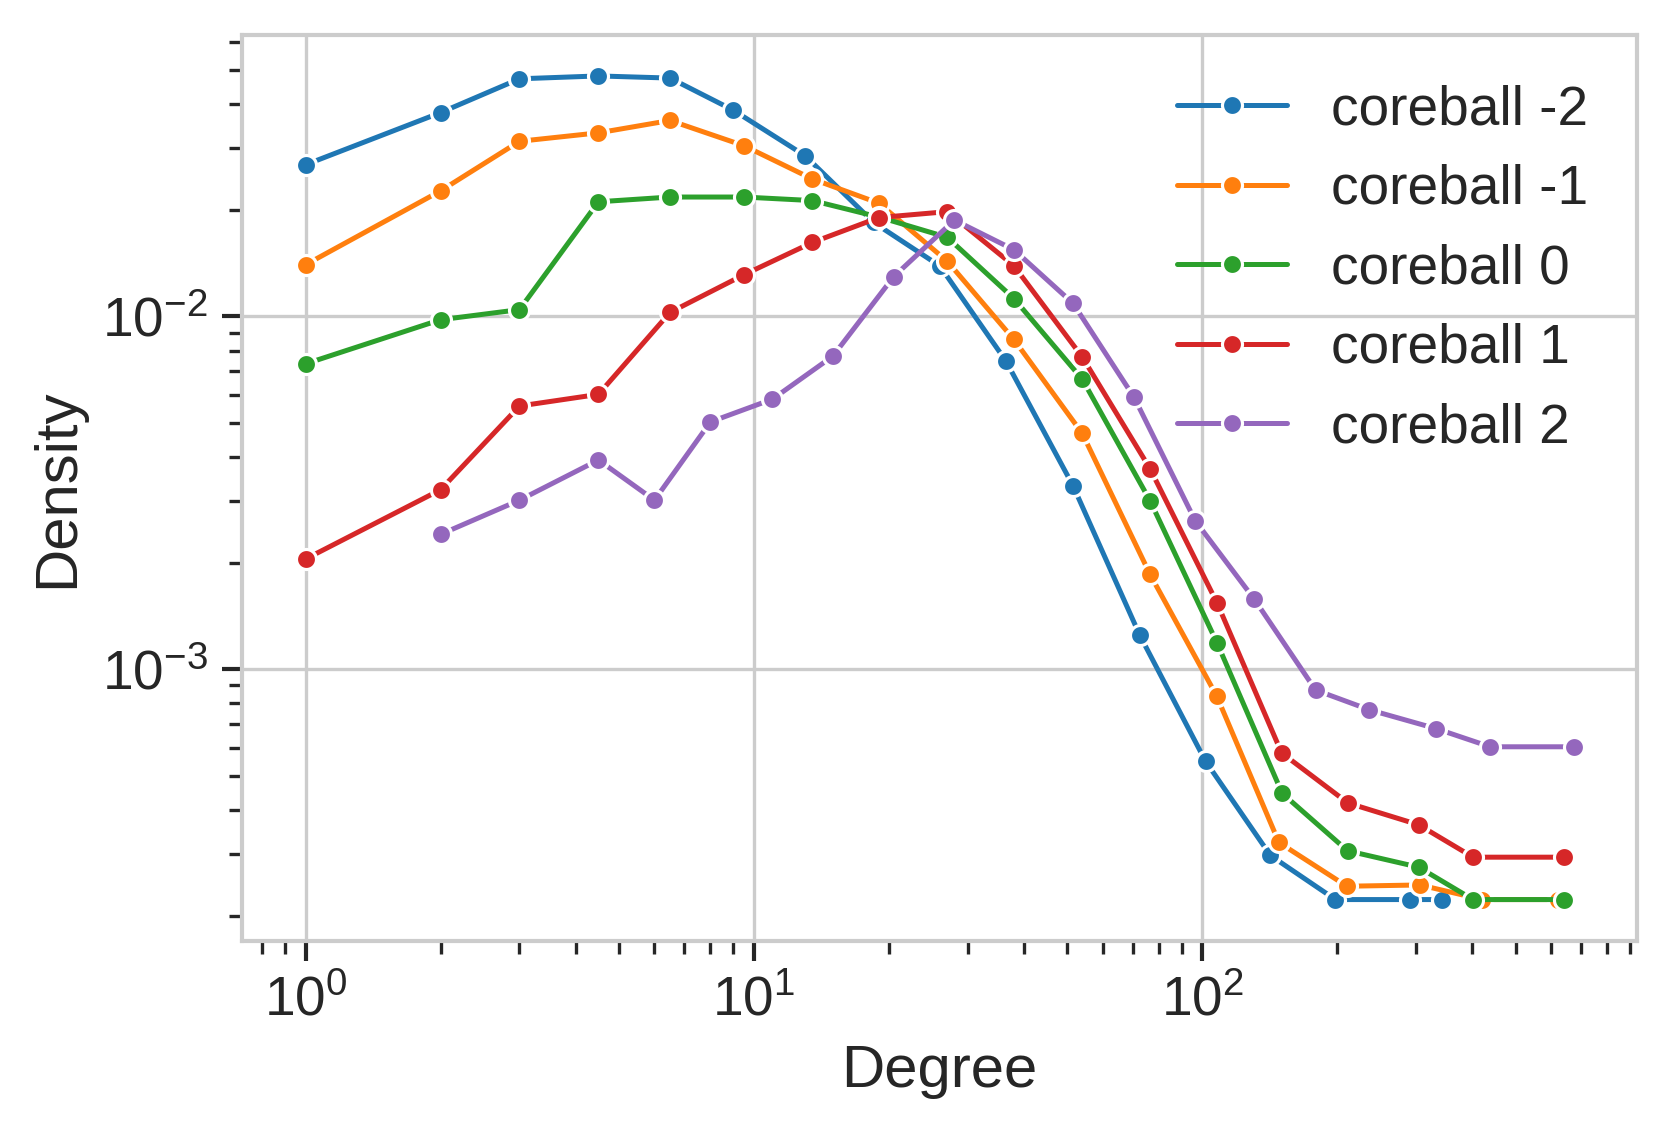

In [106]:

density=True
balltype = 'coreball'
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=300)
plt.xscale('log')
plt.yscale('log')

coeffs = [-2,-1,0,1,2]
for c in coeffs:
    print('Coefficient:', c)
    dlist = spread(c,balltype=balltype)
    log_x,log_y = test_module.degree_distribution(dlist, mode='log',density=density)
    sns.lineplot(log_x,log_y,marker='o',label= balltype+ ' ' +str(c))


plt.xlabel('Degree')
plt.ylabel('Density')
#plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + 'degree_distribOrigin_degree_'+ balltype + '_' + graph_type +'.png')

Coefficient: -2
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 24 subset: 2 in_edges: 4
new edges: 8 subset: 8 in_edges: 6
new edges: 66 subset: 7 in_edges: 17
new edges: 112 subset: 11 in_edges: 30
new edges: 73 subset: 7 in_edges: 34
new edges: 105 subset: 10 in_edges: 30


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


new edges: 57 subset: 6 in_edges: 16
new edges: 100 subset: 10 in_edges: 7
new edges: 66 subset: 7 in_edges: 19
new edges: 50 subset: 5 in_edges: 9
new edges: 38 subset: 4 in_edges: 5
new edges: 36 subset: 4 in_edges: 6
new edges: 45 subset: 4 in_edges: 8
new edges: 291 subset: 29 in_edges: 5
subgraph: nb of nodes: 83 , edges: 179
Coefficient: -1
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 11 subset: 10 in_edges: 2
new edges: 53 subset: 5 in_edges: 37
new edges: 27 subset: 3 in_edges: 14
new edges: 118 subset: 12 in_edges: 3
new edges: 393 subset: 39 in_edges: 17


/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:66: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:68: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])


new edges: 1622 subset: 162 in_edges: 87
new edges: 7249 subset: 725 in_edges: 812
new edges: 19233 subset: 1923 in_edges: 7897
new edges: 24392 subset: 2439 in_edges: 24611
new edges: 19337 subset: 1934 in_edges: 27964
-- max nb of nodes reached in iteration 11 --
new edges: 4809 subset: 481 in_edges: 5157
subgraph: nb of nodes: 4494 , edges: 52149
Coefficient: 0
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 13 subset: 10 in_edges: 2
new edges: 137 subset: 14 in_edges: 48
new edges: 334 subset: 33 in_edges: 28
new edges: 1554 subset: 155 in_edges: 87
new edges: 6375 subset: 638 in_edges: 943
new edges: 18665 subset: 1866 in_edges: 7365
new edges: 32577 subset: 3258 in_edges: 33200
new edges: 24246 subset: 2425 in_edges: 44193
-- max nb of nodes reached in iteration 9 --
new edges: 3742 subset: 374 in_edges: 3642
subgraph: nb of nodes: 4494 , edges: 65791
Coefficient: 1
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edge

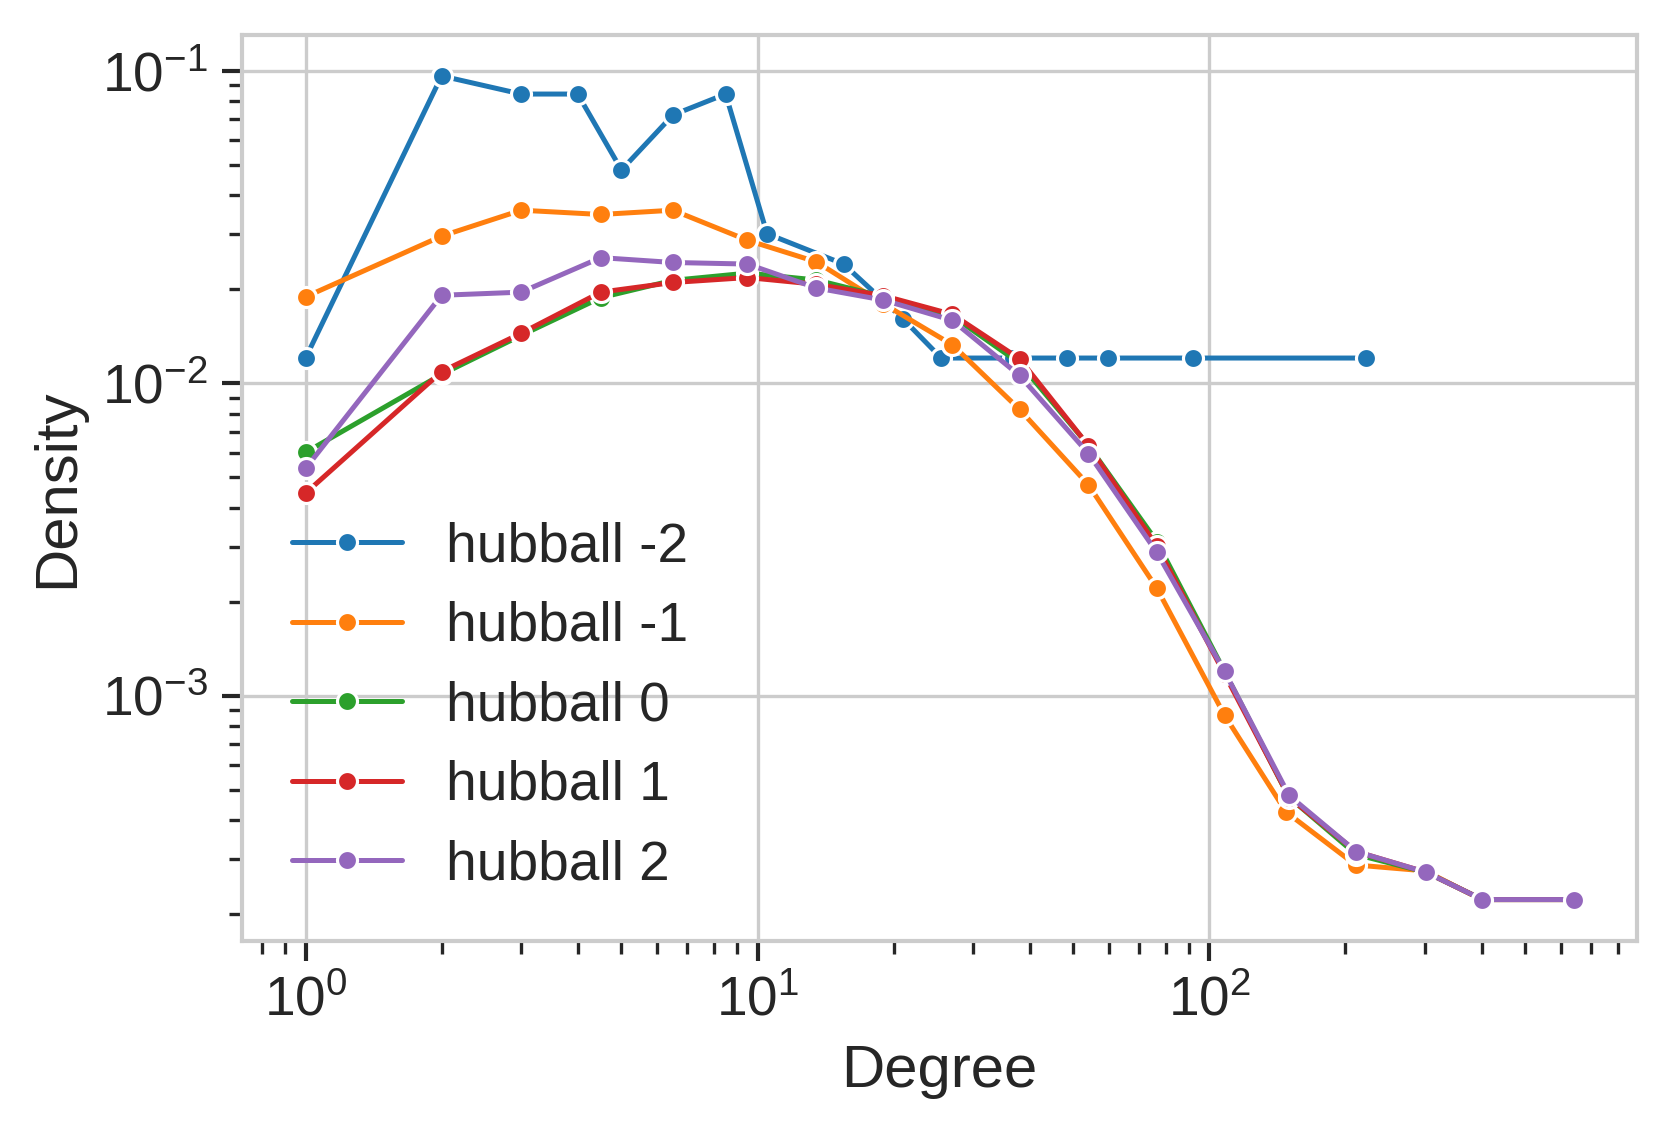

In [113]:

density=True
balltype = 'hubball'
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=300)
plt.xscale('log')
plt.yscale('log')

coeffs = [-2,-1,0,1,2]
for c in coeffs:
    print('Coefficient:', c)
    dlist = spread(c,balltype=balltype)
    log_x,log_y = test_module.degree_distribution(dlist, mode='log',density=density)
    sns.lineplot(log_x,log_y,marker='o',label= balltype+ ' ' +str(c))


plt.xlabel('Degree')
plt.ylabel('Density')
#plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + 'degree_distribOrigin_degree2_'+ balltype + '_' + graph_type +'.png')

Coefficient: -2
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 10 subset: 10 in_edges: 2
new edges: 56 subset: 6 in_edges: 27
new edges: 158 subset: 16 in_edges: 8
new edges: 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


1009 subset: 101 in_edges: 25
new edges: 2463 subset: 246 in_edges: 240
new edges: 6372 subset: 637 in_edges: 643
new edges: 11053 subset: 1105 in_edges: 2258
new edges: 15095 subset: 1510 in_edges: 4275
new edges: 15439 subset: 1544 in_edges: 5683
-- max nb of nodes reached in iteration 10 --
new edges: 8856 subset: 886 in_edges: 3604
subgraph: nb of nodes: 4494 , edges: 13981
Coefficient: -1
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 9 subset: 9 in_edges: 2
new edges: 57 subset: 6 in_edges: 26
new edges: 126 subset: 13 in_edges: 23
new edges: 373 subset: 37 in_edges: 28


/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:66: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])
/home/benjamin/Documents/EPFL/Research/sad/spiky-simulation/test_module.py:68: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(list(counter_dict.keys()),bins)[0])


new edges: 2564 subset: 256 in_edges: 76
new edges: 8273 subset: 827 in_edges: 1200
new edges: 16789 subset: 1679 in_edges: 4377
new edges: 22754 subset: 2275 in_edges: 9342
-- max nb of nodes reached in iteration 9 --
new edges: 21057 subset: 2106 in_edges: 11432
subgraph: nb of nodes: 4494 , edges: 21162
Coefficient: 0
-- experiment 0 --
Initial node 420
new edges: 15 subset: 2 in_edges: 0
new edges: 15 subset: 2 in_edges: 4
new edges: 18 subset: 2 in_edges: 7
new edges: 49 subset: 5 in_edges: 6
new edges: 53 subset: 5 in_edges: 12
new edges: 133 subset: 13 in_edges: 13
new edges: 435 subset: 44 in_edges: 25
new edges: 2498 subset: 250 in_edges: 117
new edges: 11904 subset: 1190 in_edges: 1522
new edges: 29390 subset: 2939 in_edges: 16333
new edges: 24526 subset: 2453 in_edges: 41287
-- max nb of nodes reached in iteration 11 --
new edges: 11381 subset: 1138 in_edges: 17488
subgraph: nb of nodes: 4494 , edges: 59081
Coefficient: 1
-- experiment 0 --
Initial node 420
new edges: 15 sub

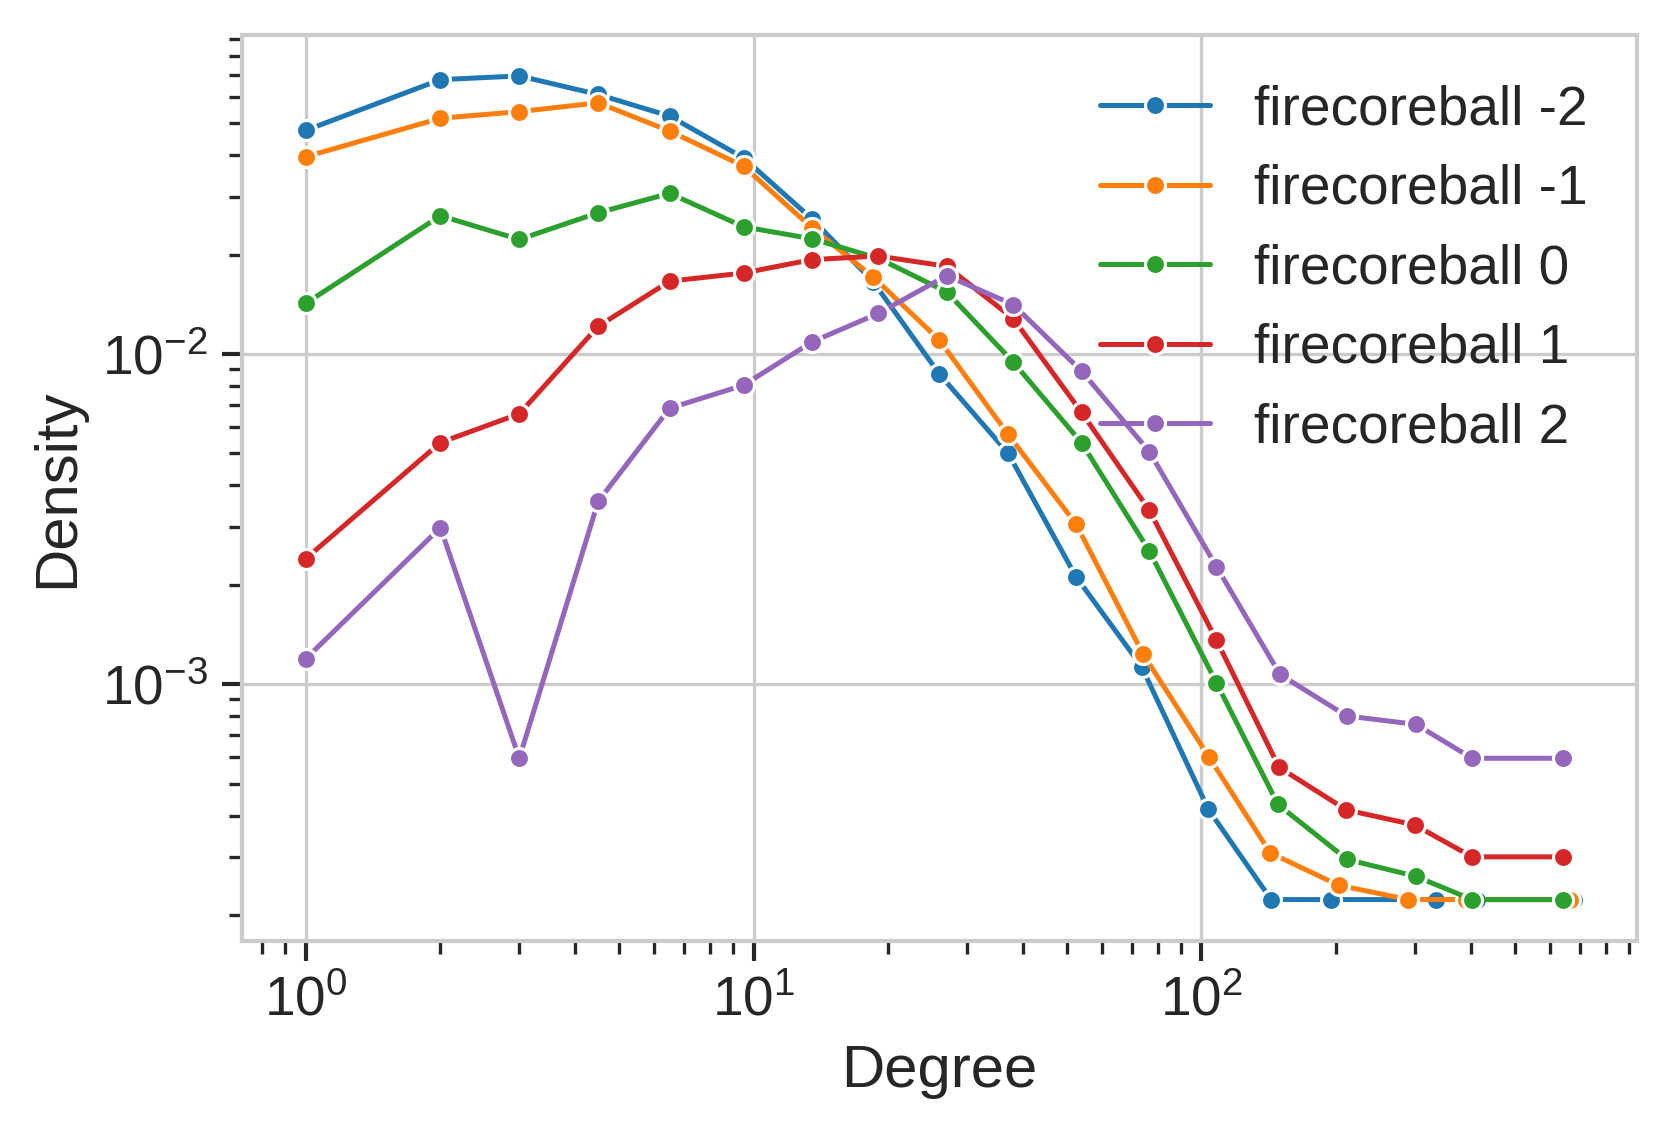

In [105]:

density=True
balltype = 'firecoreball'
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=300)
plt.xscale('log')
plt.yscale('log')

coeffs = [-2,-1,0,1,2]
for c in coeffs:
    print('Coefficient:', c)
    dlist = spread(c,balltype=balltype)
    log_x,log_y = test_module.degree_distribution(dlist, mode='log',density=density)
    sns.lineplot(log_x,log_y,marker='o',label= balltype+ ' ' +str(c))


plt.xlabel('Degree')
plt.ylabel('Density')
#plt.title('Degree distribution of sampled graphs\n from a '+G.graph['name'])
plt.legend()
plt.savefig(data_path + 'degree_distribOrigin_degree_'+ balltype + '_' + graph_type +'.png')